# COVID-19 Development in Hamburg, Germany

In [1]:
using Hamburg

In [10]:
using Dates, Gadfly, DataFrames
Gadfly.set_default_plot_size(700px, 300px)

infected = dataset("covid-19", "infected")
head(infected, 5)

,deaths,hospitalizations,intensivecare,new,recordedat,recovered,total
,Int64?,Int64?,Int64?,Int64,Date,Int64?,Int64
1,241,60,12,52,2020-10-11,7100,8963
2,241,60,12,98,2020-10-10,7000,8911
3,241,60,12,145,2020-10-09,7000,8813
4,241,59,12,125,2020-10-08,6900,8668
5,241,57,12,93,2020-10-07,6900,8543


## New cases

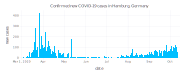

In [11]:
plot(infected, 
    y=:new, 
    x=:recordedat, 
    Geom.bar, 
    Coord.cartesian(xmin=Date(2020, 3,1), ymin=0), 
    Guide.title("Confirmed new COVID-19 cases in Hamburg, Germany"), 
    Guide.xlabel("date"), 
    Guide.ylabel("new cases"))

## Hospitalizations (total)

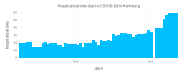

In [12]:
plot(dropmissing(infected), 
    y=:hospitalizations, 
    x=:recordedat, 
    Geom.bar, 
    Coord.cartesian(xmin=Date(2020, 8,10)), 
    Guide.title("Hospitalizations due to COVID-19 in Hamburg"), 
    Guide.xlabel("date"), 
    Guide.ylabel("hospitalizations"))

## Development in the boroughs

In [15]:
boroughsovertime = dataset("covid-19", "boroughs")
boroughs = select(boroughsovertime, Not(:recordedat))
boroughsmatrix = convert(Matrix, boroughs)
DataFrames.rename!(boroughs, "Hamburg Mitte" => "Mitte")
boroughsovertime

,Altona,Bergedorf,Eimsbüttel,Hamburg Mitte,Hamburg Nord,Harburg,Wandsbek,recordedat
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Date
1,63,39,58,94,109,70,156,2020-10-05
2,69,28,65,97,92,46,123,2020-09-28
3,79,31,83,98,143,43,181,2020-09-21
4,88,23,72,87,126,41,105,2020-09-14
5,79,17,59,88,90,21,73,2020-09-07
6,47,17,43,86,58,22,74,2020-08-31
7,49,15,38,111,36,39,67,2020-08-24
8,64,11,48,150,43,54,83,2020-08-17
9,41,17,26,95,46,48,84,2020-08-10


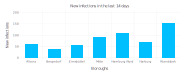

In [14]:
plot(x=names(boroughs), 
    y=boroughsmatrix[1, :], 
    Geom.bar, 
    Theme(bar_spacing=10mm), 
    Guide.xlabel("Boroughs"), 
    Guide.ylabel("New infections"),
    Guide.title("New infections in the last 14 days"))

In [20]:
tb = TimeArray(boroughsovertime, timestamp=:recordedat)

11×7 TimeArray{Int64,2,Date,Array{Int64,2}} 2020-07-27 to 2020-10-05
│            │ Altona │ Bergedorf │ Eimsbüttel │ Hamburg Mitte │ Hamburg Nord │
├────────────┼────────┼───────────┼────────────┼───────────────┼──────────────┤
│ 2020-07-27 │ 6      │ 5         │ 4          │ 19            │ 12           │
│ 2020-08-03 │ 14     │ 17        │ 12         │ 41            │ 26           │
│ 2020-08-10 │ 41     │ 17        │ 26         │ 95            │ 46           │
│ 2020-08-17 │ 64     │ 11        │ 48         │ 150           │ 43           │
│ 2020-08-24 │ 49     │ 15        │ 38         │ 111           │ 36           │
│ 2020-08-31 │ 47     │ 17        │ 43         │ 86            │ 58           │
│ 2020-09-07 │ 79     │ 17        │ 59         │ 88            │ 90           │
│ 2020-09-14 │ 88     │ 23        │ 72         │ 87            │ 126          │
│ 2020-09-21 │ 79     │ 31        │ 83         │ 98            │ 143          │
│ 2020-09-28 │ 69     │ 28        │ 65         │ 97

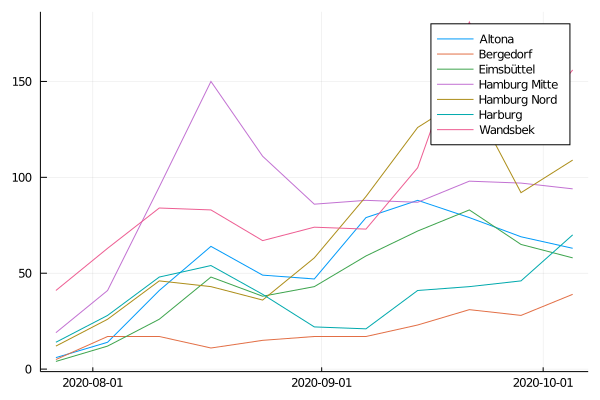

In [26]:
using Plots
Plots.plot(tb)